# 1. yahoo 주가 data 가져오기

In [ ]:
import pandas_datareader.data as pdr
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline

import yfinance as yf
yf.pdr_override()  # <-- Override to use yfinance when calling pandas_datareader

In [ ]:
import yfinance as yf

# Specify the ticker symbol
ticker_symbol = '^KS11'

# Specify the date range
start_date = '2021-01-01'
end_date = '2023-11-29'

# Download the data
data = yf.download(ticker_symbol, start=start_date, end=end_date)

# Print the downloaded data
print(data)

df=data

[*********************100%%**********************]  1 of 1 completed
                   Open         High          Low        Close    Adj Close  \
Date                                                                          
2021-01-04  2874.500000  2946.540039  2869.110107  2944.449951  2944.449951   
2021-01-05  2943.669922  2990.570068  2921.840088  2990.570068  2990.570068   
2021-01-06  2993.340088  3027.159912  2961.370117  2968.209961  2968.209961   
2021-01-07  2980.750000  3055.280029  2980.750000  3031.679932  3031.679932   
2021-01-08  3040.110107  3161.110107  3040.110107  3152.179932  3152.179932   
...                 ...          ...          ...          ...          ...   
2023-11-22  2493.169922  2516.719971  2490.429932  2511.699951  2511.699951   
2023-11-23  2515.830078  2522.199951  2507.300049  2514.959961  2514.959961   
2023-11-24  2517.879883  2521.560059  2496.629883  2496.629883  2496.629883   
2023-11-27  2501.830078  2511.370117  2489.179932  2495.659912

In [ ]:
import datetime

# 새로운 칼럼 생성
# (Price : 당일 대비 다음날 주가가 상승했으면 1, 하락했으면 0 표시)
df['Price'] = 0
for i in range(0, 120):
    if df['Close'][i] < df['Close'][i+1]:
        df['Price'][i] = 1
    else:
        df['Price'][i] = 0
df

<ipython-input-3-09cc3debcf30>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Price'][i] = 1
<ipython-input-3-09cc3debcf30>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Price'][i] = 0


,Open,High,Low,Close,Adj Close,Volume,Price
Date,,,,,,,
2021-01-04,2874.500000,2946.540039,2869.110107,2944.449951,2944.449951,1026500,1
2021-01-05,2943.669922,2990.570068,2921.840088,2990.570068,2990.570068,1519900,0
2021-01-06,2993.340088,3027.159912,2961.370117,2968.209961,2968.209961,1793400,1
2021-01-07,2980.750000,3055.280029,2980.750000,3031.679932,3031.679932,1524700,1
2021-01-08,3040.110107,3161.110107,3040.110107,3152.179932,3152.179932,1297900,0
...,...,...,...,...,...,...,...
2023-11-22,2493.169922,2516.719971,2490.429932,2511.699951,2511.699951,439500,0
2023-11-23,2515.830078,2522.199951,2507.300049,2514.959961,2514.959961,360900,0
2023-11-24,2517.879883,2521.560059,2496.629883,2496.629883,2496.629883,359400,0


In [ ]:
df = df.dropna()
df

,Open,High,Low,Close,Adj Close,Volume,Price
Date,,,,,,,
2021-01-04,2874.500000,2946.540039,2869.110107,2944.449951,2944.449951,1026500,1
2021-01-05,2943.669922,2990.570068,2921.840088,2990.570068,2990.570068,1519900,0
2021-01-06,2993.340088,3027.159912,2961.370117,2968.209961,2968.209961,1793400,1
2021-01-07,2980.750000,3055.280029,2980.750000,3031.679932,3031.679932,1524700,1
2021-01-08,3040.110107,3161.110107,3040.110107,3152.179932,3152.179932,1297900,0
...,...,...,...,...,...,...,...
2023-11-22,2493.169922,2516.719971,2490.429932,2511.699951,2511.699951,439500,0
2023-11-23,2515.830078,2522.199951,2507.300049,2514.959961,2514.959961,360900,0
2023-11-24,2517.879883,2521.560059,2496.629883,2496.629883,2496.629883,359400,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 716 entries, 2021-01-04 to 2023-11-28
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       716 non-null    float64
 1   High       716 non-null    float64
 2   Low        716 non-null    float64
 3   Close      716 non-null    float64
 4   Adj Close  716 non-null    float64
 5   Volume     716 non-null    int64  
 6   Price      716 non-null    int64  
dtypes: float64(5), int64(2)
memory usage: 44.8 KB


In [ ]:
# 'kospi_주가데이터.xlsx' 이름으로 파일 저장
df.to_csv('kospi_주가데이터.csv')

In [ ]:
price_data = pd.read_csv('kospi_주가데이터.csv')
df_0 = price_data[price_data['Price']==0]['Date']

date_0 = []
for i in range(0,len(df_0)):
    date_0.append(str(df_0.tolist()[i])[:10].replace('-',''))
date_0

['20210105',
 '20210108',
 '20210111',
 '20210114',
 '20210115',
 '20210121',
 '20210125',
 '20210126',
 '20210127',
 '20210128',
 '20210203',
 '20210205',
 '20210208',
 '20210216',
 '20210217',
 '20210219',
 '20210222',
 '20210223',
 '20210225',
 '20210303',
 '20210304',
 '20210305',
 '20210308',
 '20210309',
 '20210312',
 '20210316',
 '20210318',
 '20210319',
 '20210322',
 '20210323',
 '20210326',
 '20210330',
 '20210408',
 '20210420',
 '20210426',
 '20210427',
 '20210428',
 '20210429',
 '20210430',
 '20210510',
 '20210511',
 '20210512',
 '20210514',
 '20210518',
 '20210520',
 '20210521',
 '20210525',
 '20210526',
 '20210603',
 '20210607',
 '20210608',
 '20210616',
 '20210618',
 '20210625',
 '20210628',
 '20210629',
 '20210630',
 '20210701',
 '20210702',
 '20210705',
 '20210706',
 '20210707',
 '20210708',
 '20210709',
 '20210712',
 '20210713',
 '20210714',
 '20210715',
 '20210716',
 '20210719',
 '20210720',
 '20210721',
 '20210722',
 '20210723',
 '20210726',
 '20210727',
 '20210728',

In [ ]:
df_1 = price_data[price_data['Price']==1]['Date']

date_1 = []
for i in range(0,len(df_1)):
    date_1.append(str(df_1.tolist()[i])[:10].replace('-',''))
date_1

['20210104',
 '20210106',
 '20210107',
 '20210112',
 '20210113',
 '20210118',
 '20210119',
 '20210120',
 '20210122',
 '20210129',
 '20210201',
 '20210202',
 '20210204',
 '20210209',
 '20210210',
 '20210215',
 '20210218',
 '20210224',
 '20210226',
 '20210302',
 '20210310',
 '20210311',
 '20210315',
 '20210317',
 '20210324',
 '20210325',
 '20210329',
 '20210331',
 '20210401',
 '20210402',
 '20210405',
 '20210406',
 '20210407',
 '20210409',
 '20210412',
 '20210413',
 '20210414',
 '20210415',
 '20210416',
 '20210419',
 '20210421',
 '20210422',
 '20210423',
 '20210503',
 '20210504',
 '20210506',
 '20210507',
 '20210513',
 '20210517',
 '20210524',
 '20210527',
 '20210528',
 '20210531',
 '20210601',
 '20210602',
 '20210604',
 '20210609',
 '20210610',
 '20210611',
 '20210614',
 '20210615',
 '20210617',
 '20210621',
 '20210622',
 '20210623',
 '20210624']

In [ ]:
list_length_date_0= len(date_0)
list_length_date_1= len(date_1)
print("다음날 대비 상승 date의 개수:", list_length_date_1)
print("다음날 대비 하락 date의 개수:", list_length_date_0)

다음날 대비 상승 date의 개수: 66
다음날 대비 하락 date의 개수: 650


# 2.bigkinds data가져오기


In [ ]:
pip install selenium

In [ ]:
%pip install requests
%pip install beautifulsoup4
%pip install pandas

In [ ]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import datetime

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')


df = pd.read_excel('/content/gdrive/My Drive/Colab Notebooks/NewsResult_20210101-20231129.xlsx')


Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
df = df[['일자', '제목']]
df

,일자,제목
0,20210101,"코스피 기업 시총, GDP 넘어섰다"
1,20210101,롯데케미칼 등 화학株 실적 전망 줄줄이 상향
2,20210101,"""올 주식시장 황소랠리 온다 반도체 2차전지 유망"""
3,20210101,신기록 쏟아낸 개미 순매수 63兆 예탁금 65兆 빚투 19兆
4,20210101,2020년 가장 '재미' 안긴 재테크는 주식 금 부동산 뒤따라
...,...,...
36989,20231129,"KODEX CD금리액티브, 순자산 5조 원 돌파 “역대 최단기간” [투자360]"
36990,20231129,美 연준 매파 입에서 나온 “금리 낮출 수도” 한마디 글로벌 증시 훈풍 불까? [투...
36991,20231129,"건설주 드디어 올랐는데 ""쳐다보지 말라"" 경고한 이유"
36992,20231129,스톡옵션 규모 5년來 처음 1조원 밑돌아 2년 연속 스톡옵션王은 셀트리온 [투자360]


In [ ]:
df = df.sort_values(by='일자')

# 결과 출력
print(df)

             일자                                                제목
0      20210101                               코스피 기업 시총, GDP 넘어섰다
17     20210101                    "올 상장사 순익 130兆" 실적이 이끄는 황소장 온다
16     20210101        상반기까지는 주식 공격투자 배당주 헬스케어펀드 담아보자 [2021 신년계획]
14     20210101               "주식은 마라톤" 존리 대표가 말하는 멘탈관리법[부꾸미TALK]
13     20210101              [새해증시]'코스피 3000-코스닥1000' 올해 상반기 돌파한다
...         ...                                               ...
36971  20231129              [fn오후시황] 코스피, 기관 매도 속 약세...2510선서 등락
36970  20231129                    DS단석 “상장 통해 자원순환 선도기업으로 도약할 것”
36992  20231129  스톡옵션 규모 5년來 처음 1조원 밑돌아 2년 연속 스톡옵션王은 셀트리온 [투자360]
36980  20231129            코스피, 장초반 기관 외국인 '팔자'에 2500선 위태 [투자360]
36993  20231129                   저점 매수 통했나 포스코그룹 주가 급등에 개미들 '환호'

[36994 rows x 2 columns]


# 한글 폰트 설정

In [ ]:
# @title
!pip install koreanize-matplotlib

In [ ]:
# @title
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 15 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 12 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/

In [ ]:
# @title
import matplotlib

print(matplotlib.rcParams['font.family'])

['sans-serif']


In [ ]:
# @title
from matplotlib import font_manager

for font in font_manager.fontManager.ttflist:
    if 'Nanum' in font.name:
        print(font.name)

NanumGothicCoding
NanumSquareRound
NanumSquareRound
NanumBarunGothic
NanumBarunGothic
NanumGothicCoding
NanumGothic
NanumSquare
NanumSquare
NanumMyeongjo
NanumGothic
NanumMyeongjo


# 3.koFinBERT 모델 이용한 감성분석

Huggingface에서 이미 훈련된 koFinBERT 모델 사용 https://huggingface.co/kwoncho/KoFinBERT?library=true

In [ ]:
# Load model directly
from transformers import AutoTokenizer, AutoModelForSequenceClassification

tokenizer = AutoTokenizer.from_pretrained("kwoncho/KoFinBERT")
model = AutoModelForSequenceClassification.from_pretrained("kwoncho/KoFinBERT")

In [ ]:
# from transformers import pipeline
# import pandas as pd

# # Assuming 'model' and 'tokenizer' are already defined
# classifier = pipeline('sentiment-analysis', model=model, tokenizer=tokenizer)

# # 각 제목에 대한 감성 분석 수행
# data_titles = df['제목'].tolist()  # Convert to list
# sentiments = classifier(data_titles)

# # 결과 출력
# df['감성분류결과'] = [result['label'] for result in sentiments]

# # 결과 확인
# print(df)

In [ ]:
# 감성의 평균 구하기 위해 부정은 -1, 중립은 0, 긍정은 1로 값 바꿔줌.
# df['감성분류결과'] = df['감성분류결과'].replace(['negative', 'neutral', 'positive'],[-1, 0, 1])
# df

In [ ]:
# df['감성분류결과'].value_counts().plot(kind='bar')

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
df1 = pd.read_csv('/content/gdrive/My Drive/Colab Notebooks/SA_result.csv')
df1

,일자,제목,감성분류결과
0,20210101,"코스피 기업 시총, GDP 넘어섰다",1
1,20210101,"""올 상장사 순익 130兆"" 실적이 이끄는 황소장 온다",0
2,20210101,상반기까지는 주식 공격투자 배당주 헬스케어펀드 담아보자 [2021 신년계획],0
3,20210101,"""주식은 마라톤"" 존리 대표가 말하는 멘탈관리법[부꾸미TALK]",0
4,20210101,[새해증시]'코스피 3000-코스닥1000' 올해 상반기 돌파한다,0
...,...,...,...
36989,20231129,"[fn오후시황] 코스피, 기관 매도 속 약세...2510선서 등락",0
36990,20231129,DS단석 “상장 통해 자원순환 선도기업으로 도약할 것”,0
36991,20231129,스톡옵션 규모 5년來 처음 1조원 밑돌아 2년 연속 스톡옵션王은 셀트리온 [투자360],0
36992,20231129,"코스피, 장초반 기관 외국인 '팔자'에 2500선 위태 [투자360]",0


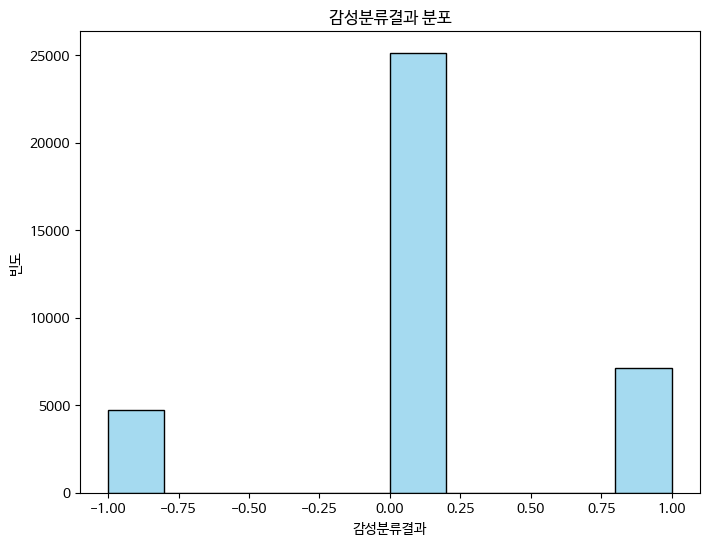

In [ ]:
import seaborn as sns

plt.rc('font', family='NanumBarunGothic')
plt.rc('axes', unicode_minus=False)
plt.figure(figsize=(8, 6))
sns.histplot(df1['감성분류결과'], bins=10, color='skyblue')
plt.title('감성분류결과 분포')
plt.xlabel('감성분류결과')
plt.ylabel('빈도')
plt.show()

In [ ]:
# 칼럼 값의 개수 확인
value_counts = df1['감성분류결과'].value_counts()

# 결과 출력
print(value_counts)

 0    25144
 1     7138
-1     4712
Name: 감성분류결과, dtype: int64


In [ ]:
# 일자별 감성분류결과의 평균 계산
df1 = df1.groupby('일자')['감성분류결과'].mean().reset_index()

# 결과 확인
df1

,일자,감성분류결과
0,20210101,0.222222
1,20210102,0.125000
2,20210103,0.384615
3,20210104,0.111111
4,20210105,0.095890
...,...,...
1055,20231125,0.000000
1056,20231126,-0.066667
1057,20231127,0.076923
1058,20231128,0.135135


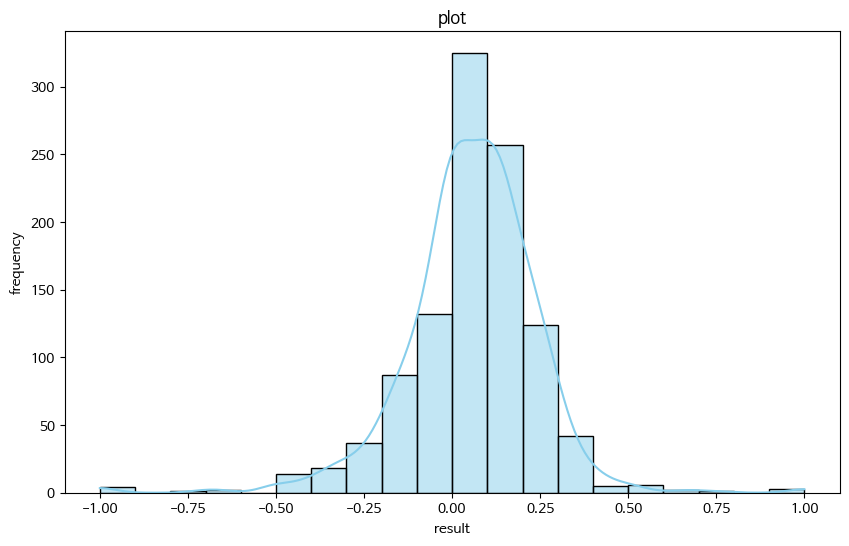

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.histplot(df1['감성분류결과'], bins=20, kde=True, color='skyblue')
plt.title('plot')
plt.xlabel('result')
plt.ylabel('frequency')
plt.show()

# 기간별 감성 모멘텀

In [ ]:
# 원하는 span size 설정
span_sizes = [3, 5, 7, 10, 14, 21, 30]

# 각 span size에 대한 모멘텀 값 계산
for span in span_sizes:
    ema = df1['감성분류결과'].ewm(span=span, adjust=False).mean()
    momentum_signal = df1['감성분류결과'] - ema
    df1[f'momentum_signal_{span}'] = momentum_signal.shift(1)

# 결과확인
df1

,일자,감성분류결과,momentum_signal_3,momentum_signal_5,momentum_signal_7,momentum_signal_10,momentum_signal_14,momentum_signal_21,momentum_signal_30
0,20210101,0.222222,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,20210102,0.125000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,20210103,0.384615,-0.048611,-0.064815,-0.072917,-0.079545,-0.084259,-0.088384,-0.090950
3,20210104,0.111111,0.105502,0.129867,0.140024,0.147330,0.151975,0.155665,0.157784
4,20210105,0.095890,-0.084001,-0.095758,-0.100110,-0.103234,-0.105325,-0.107127,-0.108255
...,...,...,...,...,...,...,...,...,...
1055,20231125,0.000000,0.038487,0.053990,0.064672,0.076343,0.088007,0.102919,0.114845
1056,20231126,-0.066667,-0.056514,-0.065017,-0.065132,-0.061505,-0.055041,-0.044178,-0.034305
1057,20231127,0.076923,-0.061590,-0.087789,-0.098849,-0.104867,-0.105480,-0.100768,-0.094457
1058,20231128,0.135135,0.041000,0.037201,0.033555,0.031682,0.033029,0.038929,0.045963


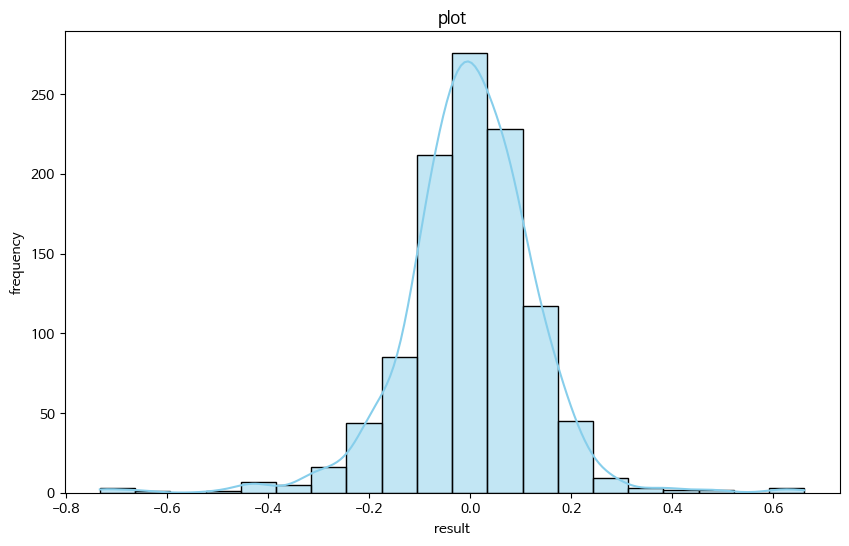

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(df1['momentum_signal_5'], bins=20, kde=True, color='skyblue')
plt.title('plot')
plt.xlabel('result')
plt.ylabel('frequency')
plt.show()

# 4. kospi 지수와 감성 데이터 통합

In [ ]:
kospi = price_data

In [ ]:
kospi

,Date,Open,High,Low,Close,Adj Close,Volume,Price
0,2021-01-04,2874.500000,2946.540039,2869.110107,2944.449951,2944.449951,1026500,1
1,2021-01-05,2943.669922,2990.570068,2921.840088,2990.570068,2990.570068,1519900,0
2,2021-01-06,2993.340088,3027.159912,2961.370117,2968.209961,2968.209961,1793400,1
3,2021-01-07,2980.750000,3055.280029,2980.750000,3031.679932,3031.679932,1524700,1
4,2021-01-08,3040.110107,3161.110107,3040.110107,3152.179932,3152.179932,1297900,0
...,...,...,...,...,...,...,...,...
711,2023-11-22,2493.169922,2516.719971,2490.429932,2511.699951,2511.699951,439500,0
712,2023-11-23,2515.830078,2522.199951,2507.300049,2514.959961,2514.959961,360900,0
713,2023-11-24,2517.879883,2521.560059,2496.629883,2496.629883,2496.629883,359400,0
714,2023-11-27,2501.830078,2511.370117,2489.179932,2495.659912,2495.659912,364700,0


In [ ]:
# 'Date' 열을 datetime 형식으로 변환
kospi['Date'] = pd.to_datetime(kospi['Date'])

# 전일 대비 종가가 상승했으면 1, 하락했으면 -1로 새로운 칼럼 '지수등락' 추가
kospi['지수등락'] = kospi['Close'].pct_change().apply(lambda x: 1 if x > 0 else -1)

# 당일 수익률 계산
kospi['전일종가대비당일수익률'] = ((kospi['Close'] - kospi['Close'].shift(1)) / kospi['Close'].shift(1))

# 결과 확인
print(kospi)

          Date         Open         High          Low        Close  \
0   2021-01-04  2874.500000  2946.540039  2869.110107  2944.449951   
1   2021-01-05  2943.669922  2990.570068  2921.840088  2990.570068   
2   2021-01-06  2993.340088  3027.159912  2961.370117  2968.209961   
3   2021-01-07  2980.750000  3055.280029  2980.750000  3031.679932   
4   2021-01-08  3040.110107  3161.110107  3040.110107  3152.179932   
..         ...          ...          ...          ...          ...   
711 2023-11-22  2493.169922  2516.719971  2490.429932  2511.699951   
712 2023-11-23  2515.830078  2522.199951  2507.300049  2514.959961   
713 2023-11-24  2517.879883  2521.560059  2496.629883  2496.629883   
714 2023-11-27  2501.830078  2511.370117  2489.179932  2495.659912   
715 2023-11-28  2506.139893  2522.449951  2502.260010  2521.760010   

       Adj Close   Volume  Price  지수등락  전일종가대비당일수익률  
0    2944.449951  1026500      1    -1          NaN  
1    2990.570068  1519900      0     1     0.015663

In [ ]:
# 'Date'와 '지수등락'를 제외한 모든 칼럼을 삭제
kospi = kospi[['Date', '지수등락', '전일종가대비당일수익률']]

# 결과 확인
print(kospi)

          Date  지수등락  전일종가대비당일수익률
0   2021-01-04    -1          NaN
1   2021-01-05     1     0.015663
2   2021-01-06    -1    -0.007477
3   2021-01-07     1     0.021383
4   2021-01-08     1     0.039747
..         ...   ...          ...
711 2023-11-22     1     0.000510
712 2023-11-23     1     0.001298
713 2023-11-24    -1    -0.007288
714 2023-11-27    -1    -0.000389
715 2023-11-28     1     0.010458

[716 rows x 3 columns]


In [ ]:
kospi['Date'] = pd.to_datetime(kospi['Date'])
df1['일자'] = pd.to_datetime(df1['일자'], format='%Y%m%d')

<ipython-input-36-b1cb8453a72b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kospi['Date'] = pd.to_datetime(kospi['Date'])


In [ ]:
# 'date' 열을 기준으로 두 데이터프레임 병합
merged_df = pd.merge(kospi, df1, left_on='Date', right_on='일자', how='inner')

# 필요 없는 'Date' 열 삭제
merged_df = merged_df.drop(columns=['일자'])

# 결과 확인
merged_df

,Date,지수등락,전일종가대비당일수익률,감성분류결과,momentum_signal_3,momentum_signal_5,momentum_signal_7,momentum_signal_10,momentum_signal_14,momentum_signal_21,momentum_signal_30
0,2021-01-04,-1,NaN,0.111111,0.105502,0.129867,0.140024,0.147330,0.151975,0.155665,0.157784
1,2021-01-05,1,0.015663,0.095890,-0.084001,-0.095758,-0.100110,-0.103234,-0.105325,-0.107127,-0.108255
2,2021-01-06,-1,-0.007477,0.082759,-0.049611,-0.073986,-0.086498,-0.096917,-0.104473,-0.111225,-0.115509
3,2021-01-07,1,0.021383,0.108108,-0.031371,-0.058078,-0.074722,-0.090040,-0.101924,-0.113051,-0.120341
4,2021-01-08,1,0.039747,0.307692,-0.003011,-0.021819,-0.037030,-0.052929,-0.066365,-0.079729,-0.088863
...,...,...,...,...,...,...,...,...,...,...,...
711,2023-11-22,1,0.000510,-0.024390,0.089212,0.130583,0.150317,0.166888,0.180678,0.196213,0.207265
712,2023-11-23,1,0.001298,0.088235,-0.085236,-0.086067,-0.082026,-0.075924,-0.068472,-0.057701,-0.049038
713,2023-11-24,-1,-0.007288,0.151515,0.013695,0.017705,0.022950,0.030028,0.038266,0.049932,0.059485
714,2023-11-27,-1,-0.000389,0.076923,-0.061590,-0.087789,-0.098849,-0.104867,-0.105480,-0.100768,-0.094457


In [ ]:
# 결측치 삭제
merged_df = merged_df.dropna()

merged_df

,Date,지수등락,전일종가대비당일수익률,감성분류결과,momentum_signal_3,momentum_signal_5,momentum_signal_7,momentum_signal_10,momentum_signal_14,momentum_signal_21,momentum_signal_30
1,2021-01-05,1,0.015663,0.095890,-0.084001,-0.095758,-0.100110,-0.103234,-0.105325,-0.107127,-0.108255
2,2021-01-06,-1,-0.007477,0.082759,-0.049611,-0.073986,-0.086498,-0.096917,-0.104473,-0.111225,-0.115509
3,2021-01-07,1,0.021383,0.108108,-0.031371,-0.058078,-0.074722,-0.090040,-0.101924,-0.113051,-0.120341
4,2021-01-08,1,0.039747,0.307692,-0.003011,-0.021819,-0.037030,-0.052929,-0.066365,-0.079729,-0.088863
5,2021-01-11,-1,-0.001183,0.086957,-0.022940,-0.057937,-0.082440,-0.108150,-0.130795,-0.154519,-0.171527
...,...,...,...,...,...,...,...,...,...,...,...
711,2023-11-22,1,0.000510,-0.024390,0.089212,0.130583,0.150317,0.166888,0.180678,0.196213,0.207265
712,2023-11-23,1,0.001298,0.088235,-0.085236,-0.086067,-0.082026,-0.075924,-0.068472,-0.057701,-0.049038
713,2023-11-24,-1,-0.007288,0.151515,0.013695,0.017705,0.022950,0.030028,0.038266,0.049932,0.059485
714,2023-11-27,-1,-0.000389,0.076923,-0.061590,-0.087789,-0.098849,-0.104867,-0.105480,-0.100768,-0.094457


In [ ]:
# 모멘텀이 양수일때는 1로, 음수일때는 -1로 다시 라벨링
merged_df[['momentum_signal_3', 'momentum_signal_5', 'momentum_signal_7', 'momentum_signal_10', 'momentum_signal_14', 'momentum_signal_21', 'momentum_signal_30']] = merged_df[['momentum_signal_3', 'momentum_signal_5', 'momentum_signal_7', 'momentum_signal_10', 'momentum_signal_14', 'momentum_signal_21', 'momentum_signal_30']].applymap(lambda x: 1 if x > 0 else (-1 if x < 0 else 0))

merged_df

<ipython-input-39-0e50f6d4595a>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_df[['momentum_signal_3', 'momentum_signal_5', 'momentum_signal_7', 'momentum_signal_10', 'momentum_signal_14', 'momentum_signal_21', 'momentum_signal_30']] = merged_df[['momentum_signal_3', 'momentum_signal_5', 'momentum_signal_7', 'momentum_signal_10', 'momentum_signal_14', 'momentum_signal_21', 'momentum_signal_30']].applymap(lambda x: 1 if x > 0 else (-1 if x < 0 else 0))


,Date,지수등락,전일종가대비당일수익률,감성분류결과,momentum_signal_3,momentum_signal_5,momentum_signal_7,momentum_signal_10,momentum_signal_14,momentum_signal_21,momentum_signal_30
1,2021-01-05,1,0.015663,0.095890,-1,-1,-1,-1,-1,-1,-1
2,2021-01-06,-1,-0.007477,0.082759,-1,-1,-1,-1,-1,-1,-1
3,2021-01-07,1,0.021383,0.108108,-1,-1,-1,-1,-1,-1,-1
4,2021-01-08,1,0.039747,0.307692,-1,-1,-1,-1,-1,-1,-1
5,2021-01-11,-1,-0.001183,0.086957,-1,-1,-1,-1,-1,-1,-1
...,...,...,...,...,...,...,...,...,...,...,...
711,2023-11-22,1,0.000510,-0.024390,1,1,1,1,1,1,1
712,2023-11-23,1,0.001298,0.088235,-1,-1,-1,-1,-1,-1,-1
713,2023-11-24,-1,-0.007288,0.151515,1,1,1,1,1,1,1
714,2023-11-27,-1,-0.000389,0.076923,-1,-1,-1,-1,-1,-1,-1


# 모멘텀 정확도 확인

In [ ]:
from sklearn.metrics import accuracy_score

# '지수등락'을 실제값, 나머지 열들을 예측값으로 사용하여 정확도 계산
actual_values = merged_df['지수등락']
predicted_values = merged_df[['momentum_signal_3', 'momentum_signal_5', 'momentum_signal_7', 'momentum_signal_10', 'momentum_signal_14', 'momentum_signal_21', 'momentum_signal_30']]

# 정확도 계산
accuracy_results = {}
for column in predicted_values.columns:
    accuracy = accuracy_score(actual_values, predicted_values[column].apply(lambda x: 1 if x > 0 else (-1 if x < 0 else 0)))
    accuracy_results[column] = accuracy

# 결과 출력
print("Accuracy Results:")
for column, accuracy in accuracy_results.items():
    print(f"{column}: {accuracy:.4f}")

Accuracy Results:
momentum_signal_3: 0.5217
momentum_signal_5: 0.5343
momentum_signal_7: 0.5287
momentum_signal_10: 0.5273
momentum_signal_14: 0.5203
momentum_signal_21: 0.5091
momentum_signal_30: 0.5231


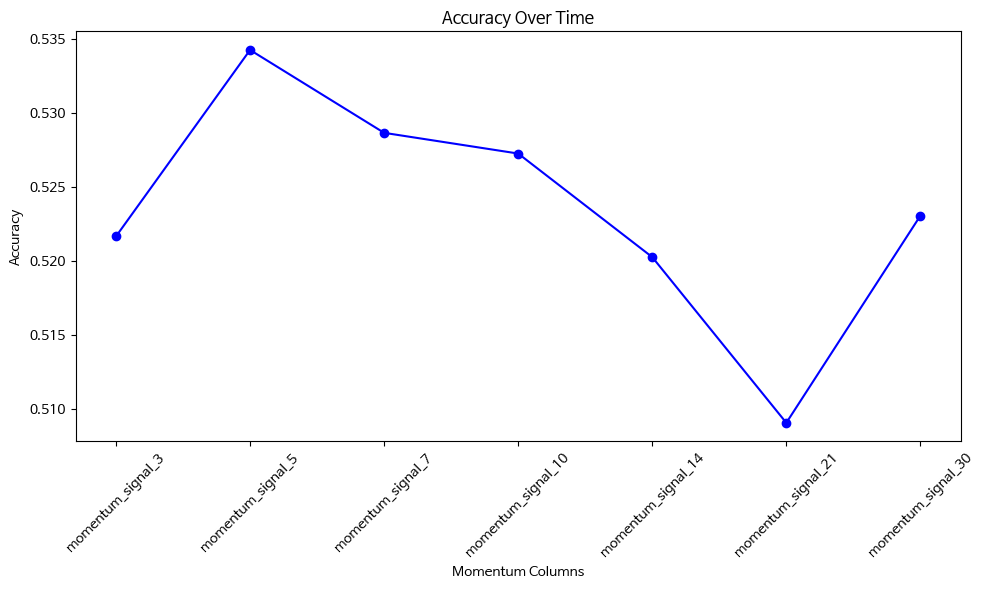

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(accuracy_results.keys(), accuracy_results.values(), marker='o', linestyle='-', color='b')
plt.title('Accuracy Over Time')
plt.xlabel('Momentum Columns')
plt.ylabel('Accuracy')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
# 모멘텀 정확도가 가장 높은 momentum_signal_5만 사용
merged_df1 = merged_df[['Date', '지수등락', '전일종가대비당일수익률', '감성분류결과', 'momentum_signal_5']]
merged_df1

,Date,지수등락,전일종가대비당일수익률,감성분류결과,momentum_signal_5
1,2021-01-05,1,0.015663,0.095890,-1
2,2021-01-06,-1,-0.007477,0.082759,-1
3,2021-01-07,1,0.021383,0.108108,-1
4,2021-01-08,1,0.039747,0.307692,-1
5,2021-01-11,-1,-0.001183,0.086957,-1
...,...,...,...,...,...
711,2023-11-22,1,0.000510,-0.024390,1
712,2023-11-23,1,0.001298,0.088235,-1
713,2023-11-24,-1,-0.007288,0.151515,1
714,2023-11-27,-1,-0.000389,0.076923,-1


# 모멘텀 시각화

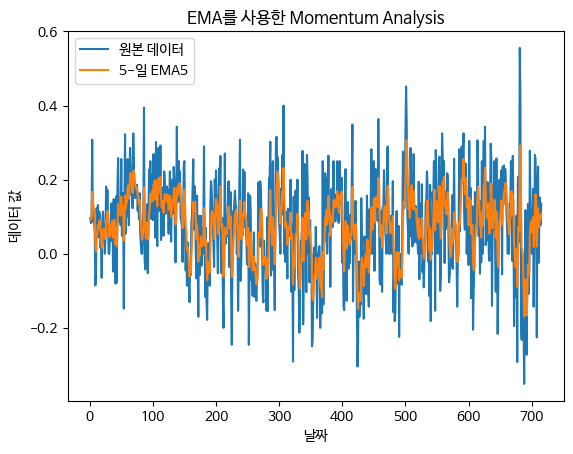

In [ ]:
# EMA 계산
span5 = 5  # EMA의 기간 설정 (주로 window_size와 유사하게 설정)
ema5 = merged_df['감성분류결과'].ewm(span=span5, adjust=False).mean()

# 시각화
plt.rc('font', family='NanumBarunGothic')
plt.plot(merged_df.index, merged_df['감성분류결과'], label='원본 데이터')
plt.plot(merged_df.index, ema5, label=f'{span5}-일 EMA5')
plt.title('EMA를 사용한 Momentum Analysis')
plt.xlabel('날짜')
plt.ylabel('데이터 값')
plt.legend()
plt.show()

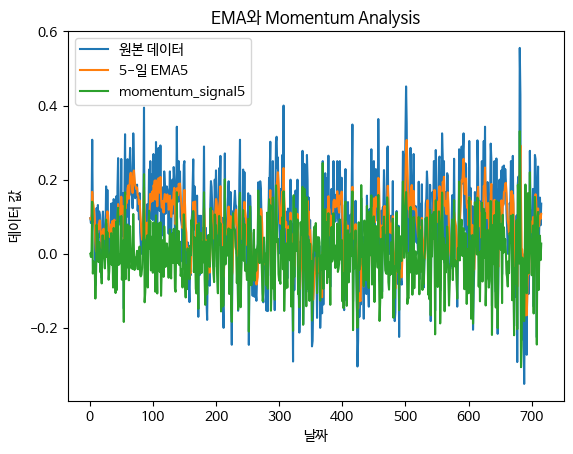

In [ ]:
# 양수 값은 상승 추세를 나타내며, 음수 값은 하락 추세
# EMA와 원본 데이터 간의 차이 계산
momentum_signal5= merged_df['감성분류결과'] - ema5

# 시각화
plt.plot(merged_df.index, merged_df['감성분류결과'], label='원본 데이터')
plt.plot(merged_df.index, ema5, label=f'{span5}-일 EMA5')
plt.plot(merged_df.index, momentum_signal5, label='momentum_signal5')
plt.title('EMA와 Momentum Analysis')
plt.xlabel('날짜')
plt.ylabel('데이터 값')
plt.legend()
plt.show()

# 코스피 및 감성 지수 값이 몇 번씩 나오는지 확인

In [ ]:
merged_df1

,Date,지수등락,전일종가대비당일수익률,감성분류결과,momentum_signal_5
1,2021-01-05,1,0.015663,0.095890,-1
2,2021-01-06,-1,-0.007477,0.082759,-1
3,2021-01-07,1,0.021383,0.108108,-1
4,2021-01-08,1,0.039747,0.307692,-1
5,2021-01-11,-1,-0.001183,0.086957,-1
...,...,...,...,...,...
711,2023-11-22,1,0.000510,-0.024390,1
712,2023-11-23,1,0.001298,0.088235,-1
713,2023-11-24,-1,-0.007288,0.151515,1
714,2023-11-27,-1,-0.000389,0.076923,-1


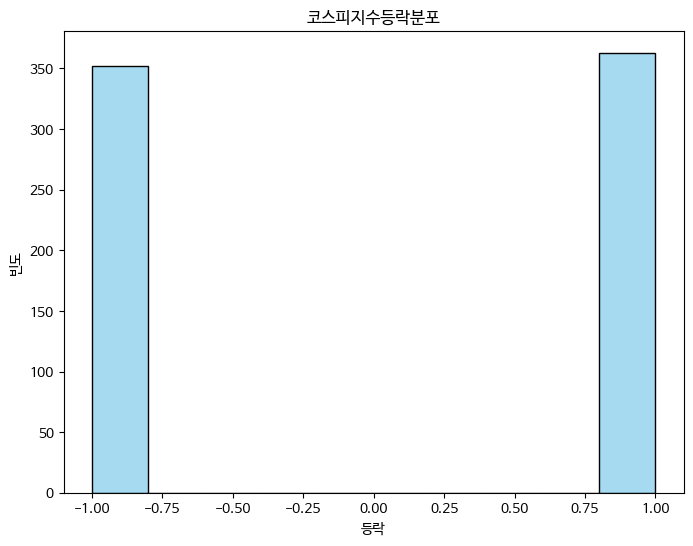

In [ ]:
plt.figure(figsize=(8, 6))
plt.rc('axes', unicode_minus=False)
sns.histplot(merged_df1['지수등락'], bins=10, color='skyblue')
plt.title('코스피지수등락분포')
plt.xlabel('등락')
plt.ylabel('빈도')
plt.show()

In [ ]:
# 코스피 지수의 상승 하락 개수
print(merged_df1['지수등락'].value_counts())

 1    363
-1    352
Name: 지수등락, dtype: int64


In [ ]:
# 시그널의 상승 하락 개수
print(merged_df1['momentum_signal_5'].value_counts())

 1    374
-1    341
Name: momentum_signal_5, dtype: int64


In [ ]:
# 매수매도 빈도 확인
changes = (merged_df1['momentum_signal_5'] != merged_df1['momentum_signal_5'].shift()).sum()

print(f'momentum_signal_5 값이 변한 횟수: {changes}')

momentum_signal_5 값이 변한 횟수: 354


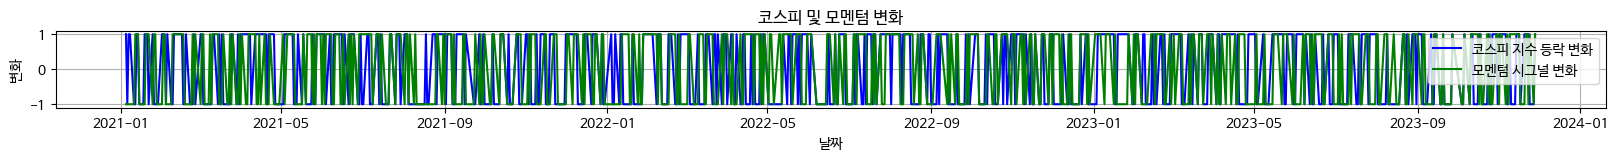

In [ ]:
# 수익률 시각화
import pandas as pd
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 1))
plt.rc('font', family='NanumBarunGothic')

plt.plot(merged_df1['Date'], merged_df1['지수등락'], label='코스피 지수 등락 변화', linestyle='-', color='b')
plt.plot(merged_df1['Date'], merged_df1['momentum_signal_5'], label='모멘텀 시그널 변화', linestyle='-', color='g')


plt.title('코스피 및 모멘텀 변화')
plt.xlabel('날짜')
plt.ylabel('변화')
plt.grid(True)
plt.legend()
plt.show()

# 백테스트 - 매일 투자할 때




In [ ]:
modified_df = merged_df1[['Date', '전일종가대비당일수익률', 'momentum_signal_5']]

In [ ]:
modified_df

,Date,전일종가대비당일수익률,momentum_signal_5
1,2021-01-05,0.015663,-1
2,2021-01-06,-0.007477,-1
3,2021-01-07,0.021383,-1
4,2021-01-08,0.039747,-1
5,2021-01-11,-0.001183,-1
...,...,...,...
711,2023-11-22,0.000510,1
712,2023-11-23,0.001298,-1
713,2023-11-24,-0.007288,1
714,2023-11-27,-0.000389,-1


In [ ]:
# 모멘텀투자시그널이 -1(부정) 일때는 공매도, 1일때는 매수했을 때 누적 수익률 계산하기

# 누적 수익률 계산
modified_df['코스피지수누적수익률'] = (1 + modified_df['전일종가대비당일수익률']).cumprod()

# 모멘텀 투자 전략에 따라 투자했을 때, 누적 수익 계산 (공매도 가능할 때)
modified_df['모멘텀기반투자_누적수익률_공매도가능시'] = (1 + modified_df['momentum_signal_5'] * modified_df['전일종가대비당일수익률']).cumprod()

# 모멘텀 투자 전략에 따라 투자했을 때 누적 수익 계산 (공매도 불가능할 때)
cumulative_return = 1
cumulative_returns = []

for i in range(len(modified_df)):
    signal = modified_df['momentum_signal_5'].iloc[i]
    daily_return = modified_df['전일종가대비당일수익률'].iloc[i]

    # 모멘텀 투자 전략에 따라 누적 수익률 갱신
    if signal == 1:  # 매수 신호
        cumulative_return *= (1 + daily_return)
    elif signal == -1:  # 매도 신호
        # 보유 중인 주식을 유지 (공매도 불가능)
        pass

    cumulative_returns.append(cumulative_return)

# 데이터프레임에 누적 수익률 추가
modified_df['모멘텀기반투자_누적수익률_공매도불가능시'] = cumulative_returns

# 결과 출력
modified_df

<ipython-input-53-1554a7aaaa67>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  modified_df['코스피지수누적수익률'] = (1 + modified_df['전일종가대비당일수익률']).cumprod()


,Date,전일종가대비당일수익률,momentum_signal_5,코스피지수누적수익률,모멘텀기반투자_누적수익률_공매도가능시,모멘텀기반투자_누적수익률_공매도불가능시
1,2021-01-05,0.015663,-1,1.015663,0.984337,1.000000
2,2021-01-06,-0.007477,-1,1.008069,0.991696,1.000000
3,2021-01-07,0.021383,-1,1.029625,0.970491,1.000000
4,2021-01-08,0.039747,-1,1.070550,0.931917,1.000000
5,2021-01-11,-0.001183,-1,1.069283,0.933019,1.000000
...,...,...,...,...,...,...
711,2023-11-22,0.000510,1,0.853029,1.355739,1.101045
712,2023-11-23,0.001298,-1,0.854136,1.353980,1.101045
713,2023-11-24,-0.007288,1,0.847910,1.344111,1.093020
714,2023-11-27,-0.000389,-1,0.847581,1.344634,1.093020


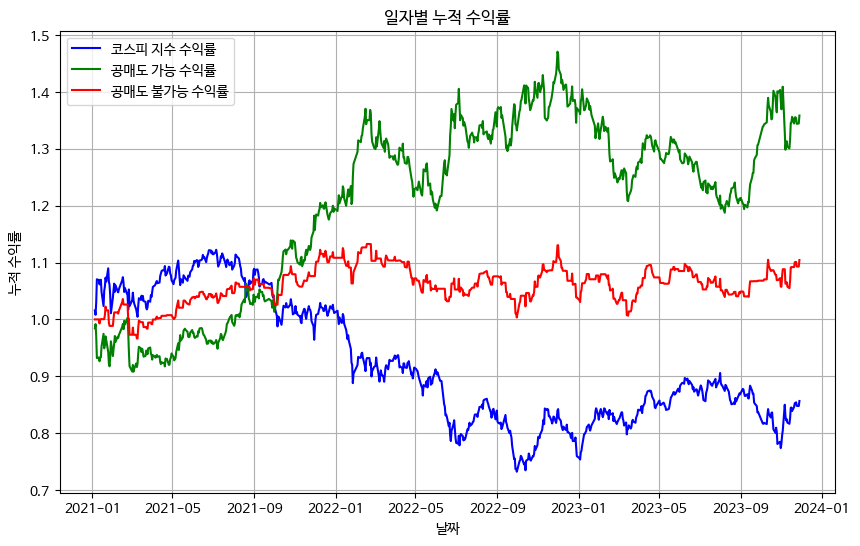

In [ ]:
# 수익률 시각화
import pandas as pd
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.rc('font', family='NanumBarunGothic')
plt.plot(modified_df['Date'], modified_df['코스피지수누적수익률'], label='코스피 지수 수익률', linestyle='-', color='b')
# 공매도 가능 수익률 그래프
plt.plot(modified_df['Date'], modified_df['모멘텀기반투자_누적수익률_공매도가능시'], label='공매도 가능 수익률', linestyle='-', color='g')

# 공매도 불가능 수익률 그래프
plt.plot(modified_df['Date'], modified_df['모멘텀기반투자_누적수익률_공매도불가능시'], label='공매도 불가능 수익률', linestyle='-', color='r')
plt.title('일자별 누적 수익률')
plt.xlabel('날짜')
plt.ylabel('누적 수익률')
plt.grid(True)
plt.legend()
plt.show()

# 백테스트 - 감성이 연속으로 2일 이상 나올 때 투자 결과

In [ ]:
merged_df1['new_signal_2'] = 0  # 새로운 칼럼 초기화
consecutive_count = 0

# 인덱스를 0부터 시작하도록 설정
merged_df1.reset_index(drop=True, inplace=True)

for i in range(2, len(merged_df1)):
    if merged_df1['momentum_signal_5'][i] == merged_df1['momentum_signal_5'][i-1]:
        merged_df1.loc[i, 'new_signal_2'] = merged_df1['momentum_signal_5'][i]

merged_df1.head(30)

<ipython-input-55-17833309783b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_df1['new_signal_2'] = 0  # 새로운 칼럼 초기화


,Date,지수등락,전일종가대비당일수익률,감성분류결과,momentum_signal_5,new_signal_2
0,2021-01-05,1,0.015663,0.095890,-1,0
1,2021-01-06,-1,-0.007477,0.082759,-1,0
2,2021-01-07,1,0.021383,0.108108,-1,-1
3,2021-01-08,1,0.039747,0.307692,-1,-1
4,2021-01-11,-1,-0.001183,0.086957,-1,-1
5,2021-01-12,-1,-0.007146,0.111111,1,0
6,2021-01-13,1,0.007147,0.082353,1,1
7,2021-01-14,1,0.000521,0.058140,1,1
8,2021-01-15,-1,-0.020327,-0.085714,-1,0
9,2021-01-18,-1,-0.023322,-0.052632,-1,-1


In [ ]:
modified_df1 = merged_df1[['Date', '전일종가대비당일수익률', 'new_signal_2']]
modified_df1

,Date,전일종가대비당일수익률,new_signal_2
0,2021-01-05,0.015663,0
1,2021-01-06,-0.007477,0
2,2021-01-07,0.021383,-1
3,2021-01-08,0.039747,-1
4,2021-01-11,-0.001183,-1
...,...,...,...
710,2023-11-22,0.000510,1
711,2023-11-23,0.001298,0
712,2023-11-24,-0.007288,0
713,2023-11-27,-0.000389,0


In [ ]:
# 모멘텀투자시그널이 -1(부정) 일때는 공매도, 1일때는 매수했을 때 누적 수익률 계산하기

# 누적 수익률 계산
modified_df1['코스피지수누적수익률'] = (1 + modified_df1['전일종가대비당일수익률']).cumprod()

# 모멘텀 투자 전략에 따라 투자했을 때, 누적 수익 계산 (공매도 가능할 때)
modified_df1['모멘텀기반투자_누적수익률_공매도가능시'] = (1 + modified_df1['new_signal_2'] * modified_df1['전일종가대비당일수익률']).cumprod()

# 모멘텀 투자 전략에 따라 투자했을 때 누적 수익 계산 (공매도 불가능할 때)
cumulative_return = 1
cumulative_returns = []

for i in range(len(modified_df1)):
    signal = modified_df1['new_signal_2'].iloc[i]
    daily_return = modified_df1['전일종가대비당일수익률'].iloc[i]

    # 모멘텀 투자 전략에 따라 누적 수익률 갱신
    if signal == 1:  # 매수 신호
        cumulative_return *= (1 + daily_return)
    elif signal == -1:  # 매도 신호
        # 보유 중인 주식을 유지 (공매도 불가능)
        pass

    cumulative_returns.append(cumulative_return)

# 데이터프레임에 누적 수익률 추가
modified_df1['모멘텀기반투자_누적수익률_공매도불가능시'] = cumulative_returns

# 결과 출력
modified_df1

<ipython-input-57-5ce8ce704a56>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  modified_df1['코스피지수누적수익률'] = (1 + modified_df1['전일종가대비당일수익률']).cumprod()
<ipython-input-57-5ce8ce704a56>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  modified_df1['모멘텀기반투자_누적수익률_공매도가능시'] = (1 + modified_df1['new_signal_2'] * modified_df1['전일종가대비당일수익률']).cumprod()


,Date,전일종가대비당일수익률,new_signal_2,코스피지수누적수익률,모멘텀기반투자_누적수익률_공매도가능시,모멘텀기반투자_누적수익률_공매도불가능시
0,2021-01-05,0.015663,0,1.015663,1.000000,1.000000
1,2021-01-06,-0.007477,0,1.008069,1.000000,1.000000
2,2021-01-07,0.021383,-1,1.029625,0.978617,1.000000
3,2021-01-08,0.039747,-1,1.070550,0.939720,1.000000
4,2021-01-11,-0.001183,-1,1.069283,0.940832,1.000000
...,...,...,...,...,...,...
710,2023-11-22,0.000510,1,0.853029,1.121183,1.027807
711,2023-11-23,0.001298,0,0.854136,1.121183,1.027807
712,2023-11-24,-0.007288,0,0.847910,1.121183,1.027807
713,2023-11-27,-0.000389,0,0.847581,1.121183,1.027807


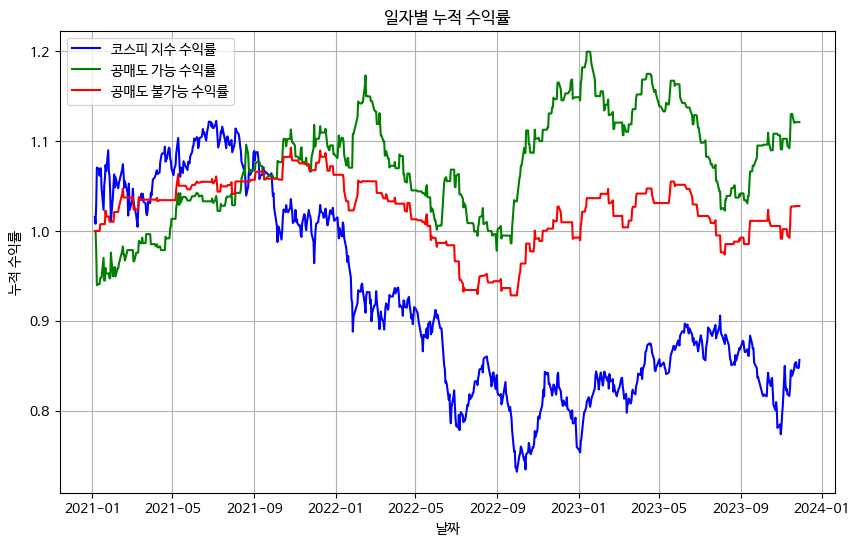

In [ ]:
# 수익률 시각화
import pandas as pd
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.rc('font', family='NanumBarunGothic')
plt.plot(modified_df1['Date'], modified_df1['코스피지수누적수익률'], label='코스피 지수 수익률', linestyle='-', color='b')
# 공매도 가능 수익률 그래프
plt.plot(modified_df1['Date'], modified_df1['모멘텀기반투자_누적수익률_공매도가능시'], label='공매도 가능 수익률', linestyle='-', color='g')

# 공매도 불가능 수익률 그래프
plt.plot(modified_df1['Date'], modified_df1['모멘텀기반투자_누적수익률_공매도불가능시'], label='공매도 불가능 수익률', linestyle='-', color='r')
plt.title('일자별 누적 수익률')
plt.xlabel('날짜')
plt.ylabel('누적 수익률')
plt.grid(True)
plt.legend()
plt.show()

In [ ]:
# 'new_signal_2' 열에서 값이 0이 아닌 행만 남기기
df_filtered = modified_df1[modified_df1['new_signal_2'] != 0]

df_filtered

,Date,전일종가대비당일수익률,new_signal_2,코스피지수누적수익률,모멘텀기반투자_누적수익률_공매도가능시,모멘텀기반투자_누적수익률_공매도불가능시
2,2021-01-07,0.021383,-1,1.029625,0.978617,1.000000
3,2021-01-08,0.039747,-1,1.070550,0.939720,1.000000
4,2021-01-11,-0.001183,-1,1.069283,0.940832,1.000000
6,2021-01-13,0.007147,1,1.069229,0.947556,1.007147
7,2021-01-14,0.000521,1,1.069786,0.948049,1.007671
...,...,...,...,...,...,...
704,2023-11-14,0.012268,1,0.826385,1.105428,1.004604
705,2023-11-15,0.021954,1,0.844528,1.129696,1.026660
706,2023-11-16,0.000607,1,0.845041,1.130382,1.027283
708,2023-11-20,0.008644,-1,0.846066,1.120611,1.027283


In [ ]:
# 'new_signal_2' 열에서 -1과 1로 값이 몇 번 바뀌는지 확인
change_count = (df_filtered['new_signal_2'] != df_filtered['new_signal_2'].shift()).sum()

print(f"값이 바뀐 횟수: {change_count}")

값이 바뀐 횟수: 124


# 백테스트 - 감성이 연속으로 3일 이상 나올 때 투자 결과

In [ ]:
merged_df1['new_signal'] = 0  # 새로운 칼럼 초기화
consecutive_count = 0

# 인덱스를 0부터 시작하도록 설정
merged_df1.reset_index(drop=True, inplace=True)

for i in range(2, len(merged_df1)):
    if merged_df1['momentum_signal_5'][i] == merged_df1['momentum_signal_5'][i-1] == merged_df1['momentum_signal_5'][i-2]:
        merged_df1.loc[i, 'new_signal'] = merged_df1['momentum_signal_5'][i]

merged_df1.head(30)

<ipython-input-61-1437eb3b04bb>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_df1['new_signal'] = 0  # 새로운 칼럼 초기화


,Date,지수등락,전일종가대비당일수익률,감성분류결과,momentum_signal_5,new_signal_2,new_signal
0,2021-01-05,1,0.015663,0.095890,-1,0,0
1,2021-01-06,-1,-0.007477,0.082759,-1,0,0
2,2021-01-07,1,0.021383,0.108108,-1,-1,-1
3,2021-01-08,1,0.039747,0.307692,-1,-1,-1
4,2021-01-11,-1,-0.001183,0.086957,-1,-1,-1
5,2021-01-12,-1,-0.007146,0.111111,1,0,0
6,2021-01-13,1,0.007147,0.082353,1,1,0
7,2021-01-14,1,0.000521,0.058140,1,1,1
8,2021-01-15,-1,-0.020327,-0.085714,-1,0,0
9,2021-01-18,-1,-0.023322,-0.052632,-1,-1,0


In [ ]:
print(merged_df1['new_signal'].value_counts())

 0    532
 1    100
-1     83
Name: new_signal, dtype: int64


In [ ]:
merged_df1['new_signal'] = merged_df1['new_signal'].fillna(0).astype(int)
merged_df1

<ipython-input-63-94149e52c146>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_df1['new_signal'] = merged_df1['new_signal'].fillna(0).astype(int)


,Date,지수등락,전일종가대비당일수익률,감성분류결과,momentum_signal_5,new_signal_2,new_signal
0,2021-01-05,1,0.015663,0.095890,-1,0,0
1,2021-01-06,-1,-0.007477,0.082759,-1,0,0
2,2021-01-07,1,0.021383,0.108108,-1,-1,-1
3,2021-01-08,1,0.039747,0.307692,-1,-1,-1
4,2021-01-11,-1,-0.001183,0.086957,-1,-1,-1
...,...,...,...,...,...,...,...
710,2023-11-22,1,0.000510,-0.024390,1,1,0
711,2023-11-23,1,0.001298,0.088235,-1,0,0
712,2023-11-24,-1,-0.007288,0.151515,1,0,0
713,2023-11-27,-1,-0.000389,0.076923,-1,0,0


In [ ]:
modified_df1 = merged_df1[['Date', '전일종가대비당일수익률', 'new_signal']]
modified_df1

,Date,전일종가대비당일수익률,new_signal
0,2021-01-05,0.015663,0
1,2021-01-06,-0.007477,0
2,2021-01-07,0.021383,-1
3,2021-01-08,0.039747,-1
4,2021-01-11,-0.001183,-1
...,...,...,...
710,2023-11-22,0.000510,0
711,2023-11-23,0.001298,0
712,2023-11-24,-0.007288,0
713,2023-11-27,-0.000389,0


In [ ]:
# 모멘텀투자시그널이 -1(부정) 일때는 공매도, 1일때는 매수했을 때 누적 수익률 계산하기

# 누적 수익률 계산
modified_df1['코스피지수누적수익률'] = (1 + modified_df1['전일종가대비당일수익률']).cumprod()

# 모멘텀 투자 전략에 따라 투자했을 때, 누적 수익 계산 (공매도 가능할 때)
modified_df1['모멘텀기반투자_누적수익률_공매도가능시'] = (1 + modified_df1['new_signal'] * modified_df1['전일종가대비당일수익률']).cumprod()

# 모멘텀 투자 전략에 따라 투자했을 때 누적 수익 계산 (공매도 불가능할 때)
cumulative_return = 1
cumulative_returns = []

for i in range(len(modified_df1)):
    signal = modified_df1['new_signal'].iloc[i]
    daily_return = modified_df1['전일종가대비당일수익률'].iloc[i]

    # 모멘텀 투자 전략에 따라 누적 수익률 갱신
    if signal == 1:  # 매수 신호
        cumulative_return *= (1 + daily_return)
    elif signal == -1:  # 매도 신호
        # 보유 중인 주식을 유지 (공매도 불가능)
        pass

    cumulative_returns.append(cumulative_return)

# 데이터프레임에 누적 수익률 추가
modified_df1['모멘텀기반투자_누적수익률_공매도불가능시'] = cumulative_returns

# 결과 출력
modified_df1

<ipython-input-65-ad81aa6c4767>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  modified_df1['코스피지수누적수익률'] = (1 + modified_df1['전일종가대비당일수익률']).cumprod()
<ipython-input-65-ad81aa6c4767>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  modified_df1['모멘텀기반투자_누적수익률_공매도가능시'] = (1 + modified_df1['new_signal'] * modified_df1['전일종가대비당일수익률']).cumprod()
<ipython-input-65-ad81aa6c4767>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexe

,Date,전일종가대비당일수익률,new_signal,코스피지수누적수익률,모멘텀기반투자_누적수익률_공매도가능시,모멘텀기반투자_누적수익률_공매도불가능시
0,2021-01-05,0.015663,0,1.015663,1.000000,1.000000
1,2021-01-06,-0.007477,0,1.008069,1.000000,1.000000
2,2021-01-07,0.021383,-1,1.029625,0.978617,1.000000
3,2021-01-08,0.039747,-1,1.070550,0.939720,1.000000
4,2021-01-11,-0.001183,-1,1.069283,0.940832,1.000000
...,...,...,...,...,...,...
710,2023-11-22,0.000510,0,0.853029,0.876138,0.952785
711,2023-11-23,0.001298,0,0.854136,0.876138,0.952785
712,2023-11-24,-0.007288,0,0.847910,0.876138,0.952785
713,2023-11-27,-0.000389,0,0.847581,0.876138,0.952785


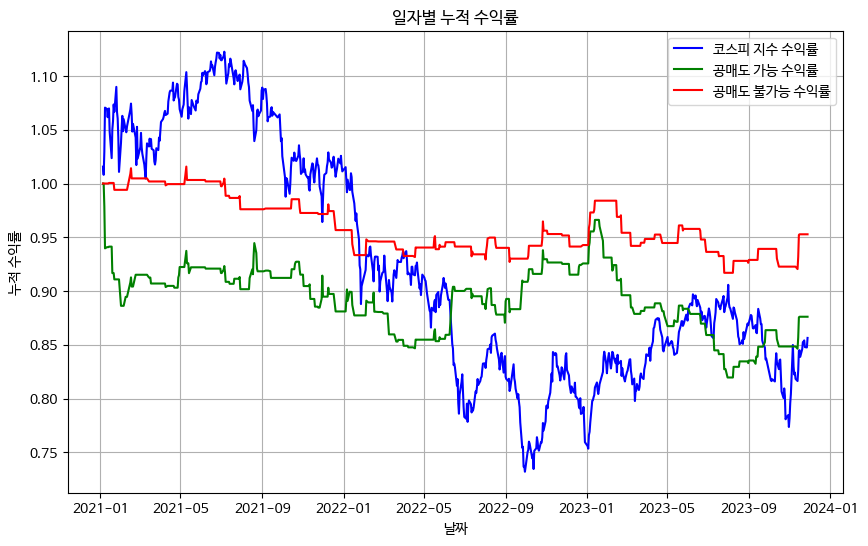

In [ ]:
# 수익률 시각화
import pandas as pd
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.rc('font', family='NanumBarunGothic')
plt.plot(modified_df1['Date'], modified_df1['코스피지수누적수익률'], label='코스피 지수 수익률', linestyle='-', color='b')
# 공매도 가능 수익률 그래프
plt.plot(modified_df1['Date'], modified_df1['모멘텀기반투자_누적수익률_공매도가능시'], label='공매도 가능 수익률', linestyle='-', color='g')

# 공매도 불가능 수익률 그래프
plt.plot(modified_df1['Date'], modified_df1['모멘텀기반투자_누적수익률_공매도불가능시'], label='공매도 불가능 수익률', linestyle='-', color='r')
plt.title('일자별 누적 수익률')
plt.xlabel('날짜')
plt.ylabel('누적 수익률')
plt.grid(True)
plt.legend()
plt.show()

In [ ]:
# 'new_signal_2' 열에서 값이 0이 아닌 행만 남기기
df_filtered1 = modified_df1[modified_df1['new_signal'] != 0]

df_filtered1

,Date,전일종가대비당일수익률,new_signal,코스피지수누적수익률,모멘텀기반투자_누적수익률_공매도가능시,모멘텀기반투자_누적수익률_공매도불가능시
2,2021-01-07,0.021383,-1,1.029625,0.978617,1.000000
3,2021-01-08,0.039747,-1,1.070550,0.939720,1.000000
4,2021-01-11,-0.001183,-1,1.069283,0.940832,1.000000
7,2021-01-14,0.000521,1,1.069786,0.941322,1.000521
10,2021-01-19,0.026122,-1,1.050335,0.916733,1.000521
...,...,...,...,...,...,...
683,2023-10-16,-0.008106,1,0.827401,0.848490,0.922718
703,2023-11-13,-0.002448,1,0.816370,0.846412,0.920458
704,2023-11-14,0.012268,1,0.826385,0.856796,0.931751
705,2023-11-15,0.021954,1,0.844528,0.875606,0.952207


In [ ]:
# 'new_signal' 열에서 -1과 1로 값이 몇 번 바뀌는지 확인
change_count = (df_filtered1['new_signal'] != df_filtered1['new_signal'].shift()).sum()

print(f"값이 바뀐 횟수: {change_count}")

값이 바뀐 횟수: 70
